<a href="https://colab.research.google.com/github/catmasteryip/Deep-Learning/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
transform = transforms.ToTensor()

Download data to google colab sample_data file


In [4]:
train_data = datasets.MNIST(root='sample_data',train=True,download=True,transform=transform)

Extracting sample_data/MNIST/raw/train-images-idx3-ubyte.gz to sample_data/MNIST/raw


Extracting sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to sample_data/MNIST/raw


Extracting sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to sample_data/MNIST/raw




Extracting sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to sample_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
test_data = datasets.MNIST(root='sample_data',train=False,download=True,transform=transform)

Set data feeder with shuffling and sizing in batches

In [0]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=True)

The CNN model itself

In [0]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    #1 input channel, 6 output channels, 3*3 kernel, 1 stride
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  
  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    #flatten
    X = X.view(-1,16*5*5)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)

In [9]:
torch.manual_seed(42)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

No of parameters in the instance

In [10]:
for param in model.parameters():
  print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

Training

In [13]:
import time 
start_time = time.time()

#Trackers
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#Training
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data,1)[1]
    #sum of True/False 
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr
    #turn off backprop of optimizer
    optimizer.zero_grad()
    #backprop the loss
    loss.backward()
    optimizer.step()
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')
  train_losses.append(loss)
  train_correct.append(trn_corr)
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()
  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training took {total/60} mins')

Epoch: 0 Batch: 600 Loss: 0.3081522583961487
Epoch: 0 Batch: 1200 Loss: 0.40271228551864624
Epoch: 0 Batch: 1800 Loss: 0.10895148664712906
Epoch: 0 Batch: 2400 Loss: 0.01451927237212658
Epoch: 0 Batch: 3000 Loss: 0.34169647097587585
Epoch: 0 Batch: 3600 Loss: 0.00635079899802804
Epoch: 0 Batch: 4200 Loss: 0.04204734042286873
Epoch: 0 Batch: 4800 Loss: 0.02241727150976658
Epoch: 0 Batch: 5400 Loss: 0.0202290378510952
Epoch: 0 Batch: 6000 Loss: 0.025541434064507484
Epoch: 1 Batch: 600 Loss: 0.009591922163963318
Epoch: 1 Batch: 1200 Loss: 0.0013541358057409525
Epoch: 1 Batch: 1800 Loss: 0.011379025876522064
Epoch: 1 Batch: 2400 Loss: 0.3250565230846405
Epoch: 1 Batch: 3000 Loss: 0.00012697491911239922
Epoch: 1 Batch: 3600 Loss: 0.029196565970778465
Epoch: 1 Batch: 4200 Loss: 0.00015873876691330224
Epoch: 1 Batch: 4800 Loss: 0.06185828894376755
Epoch: 1 Batch: 5400 Loss: 0.0012439806014299393
Epoch: 1 Batch: 6000 Loss: 0.0003185656387358904
Epoch: 2 Batch: 600 Loss: 0.09490613639354706
Epo

Losses

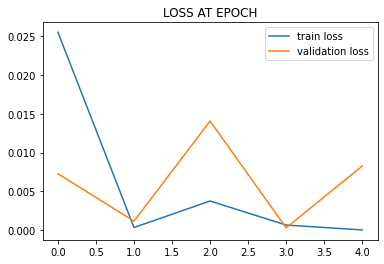

In [29]:
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='validation loss')
plt.title('LOSS AT EPOCH')
plt.legend()

Accuracies

/pytorch/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


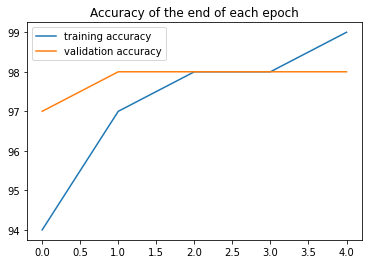

In [16]:
plt.plot([t/600 for t in train_correct],label='training accuracy')
plt.plot([t/100 for t in test_correct],label='validation accuracy')
plt.title('Accuracy of the end of each epoch')
plt.legend()

In [0]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [0]:
with torch.no_grad():
  correct = 0
  for X_test,y_test in test_load_all:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [19]:
correct.item()/len(test_data)

0.9852

In [21]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()
print(confusion_matrix(predicted.view(-1),y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 967    0    1    0    0    2    2    0    0    1]
 [   1 1133    5    0    1    1    5    3    0    2]
 [   1    0  998    0    0    0    0    1    0    0]
 [   0    0    0 1004    0   12    0    1    1    3]
 [   0    1    1    0  975    0    6    0    1    5]
 [   1    0    0    0    0  868    6    0    1    3]
 [   2    0    0    0    1    1  936    0    1    0]
 [   3    1   25    4    0    3    0 1020    2    5]
 [   3    0    2    2    0    1    3    1  962    1]
 [   2    0    0    0    5    4    0    2    6  989]]


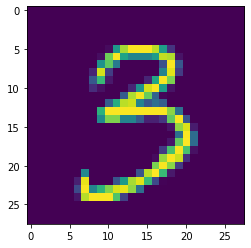

In [25]:
plt.imshow(test_data[2020][0].reshape(28,28))

In [0]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[2020][0].view(1,1,28,28))

In [28]:
new_prediction.argmax()

tensor(3)